In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, SVR # SVM-C분류용, SVM-R회귀용
import mglearn
from sklearn.model_selection import train_test_split 

In [56]:
df = pd.read_csv('wine.data',header=None)
df.shape

(178, 14)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [58]:
df.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [59]:
df.columns = ['Origin','Alcohol','Malic acid','Ash','Alcalinity of ash',
'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
'Color intensity','Hue','OD280/OD315 of diluted wines','Proline']


In [60]:
df.tail(5)

,Origin,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [61]:
df.cov()

,Origin,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Origin,0.600679,-0.206515,0.379039,-0.010555,1.340364,-2.315495,-0.348835,-0.656091,0.047177,-0.221413,0.477339,-0.109368,-0.433737,-154.667651
Alcohol,-0.206515,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
Malic acid,0.379039,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
Ash,-0.010555,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
Alcalinity of ash,1.340364,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
Magnesium,-2.315495,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
Total phenols,-0.348835,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
Flavanoids,-0.656091,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
Nonflavanoid phenols,0.047177,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
Proanthocyanins,-0.221413,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334


In [62]:
df.describe()

,Origin,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [63]:
df.isna().sum().sum()

0

In [64]:
df.keys()

Index(['Origin', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [65]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X, y

(     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
 0      14.23        1.71  2.43               15.6        127           2.80   
 1      13.20        1.78  2.14               11.2        100           2.65   
 2      13.16        2.36  2.67               18.6        101           2.80   
 3      14.37        1.95  2.50               16.8        113           3.85   
 4      13.24        2.59  2.87               21.0        118           2.80   
 5      14.20        1.76  2.45               15.2        112           3.27   
 6      14.39        1.87  2.45               14.6         96           2.50   
 7      14.06        2.15  2.61               17.6        121           2.60   
 8      14.83        1.64  2.17               14.0         97           2.80   
 9      13.86        1.35  2.27               16.0         98           2.98   
 10     14.10        2.16  2.30               18.0        105           2.95   
 11     14.12        1.48  2.32         

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [78]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [79]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8345864661654135, 0.7333333333333333)

In [81]:
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
lr.score(X_test, y_test)

0.9034788351474704

In [87]:
model = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

In [88]:
model.score(X_test, y_test)

0.9777777777777777

In [91]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
rf.score(X_train,y_train), rf.score(X_test,y_test)

(1.0, 1.0)

In [92]:
rf.feature_importances_

array([0.14421745, 0.02549236, 0.01263864, 0.0302336 , 0.02706834,
       0.07095901, 0.15399745, 0.01180802, 0.02354068, 0.15074086,
       0.08225602, 0.12113222, 0.14591535])

In [97]:
df.columns

Index(['Origin', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

<BarContainer object of 13 artists>

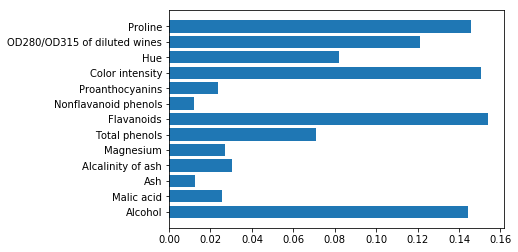

In [98]:
plt.barh(X_train.columns, rf.feature_importances_)

<BarContainer object of 13 artists>

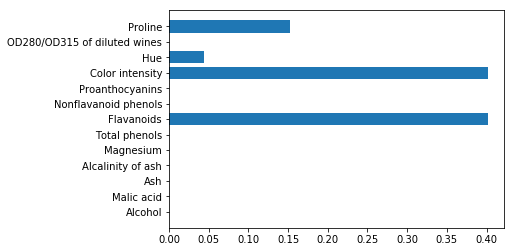

In [99]:
plt.barh(X_train.columns, model.feature_importances_)